import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm

# Interview Prep Questions from Towards Data Science

https://towardsdatascience.com/40-statistics-interview-problems-and-answers-for-data-scientists-6971a02b7eee

* Problem 26

*Infection rates at a hospital above a 1 infection per 100 person-days at risk are considered high. A hospital had 10 infections over the last 1787 person-days at risk. Give the p-value of the correct one-sided test of whether the hospital is below the standard.*

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space. P(k event in interval) $~= \frac{\lambda^k e^{-\lambda}}{k!}$, where $\lambda$ is the average number of events per interval. 

For this particular problem, the question is to test null hypothesis w.r.t alternate such as 

$H_0$: $\lambda_0 = 1$ infection per person-days

$H_1$: $\lambda_1 > 1$ infection per person-days

k = 10 infections

$\lambda= 1/100 * 1787$

Find P(k=10) for one-sided test, meaning compare it to $\alpha/2$.

P(k=10) = 0.016 , alpha/2 =  0.025


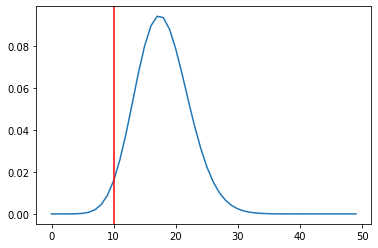

In [27]:
def poisson(k, lamb):
    return (lamb**k)*np.exp(-lamb)/np.math.factorial(k)

k_range = np.arange(50)
mu = (1/100)*1787

dist = [poisson(k, lamb) for k in k_range]

plt.plot(k, dist)
#plt.plot(10, 0.04,'x')
plt.axvline(x=10, color='red')
print('P(k=10) =', round(poisson(k_range[10], mu),3), ', alpha/2 = ', 0.05/2)



since P(k=10) < $\alpha$/2, we reject the $H_0$ hypothesis, concluding hospital is below the standard.

## Qunatile-Quantile plots

Lets have 10 numerically sorted observations from a random number generator that follows a Student’s T-distribution with 1 degree of freedom. Lets draw N-1 = 9 quantiles.

In [80]:
N = 10
t_dist = sorted(np.random.standard_t(1, size=N))
print(t_dist)

[-2.086530647729873, -1.87550573003738, -1.278347177276567, -0.8739334603121296, -0.4664653169506629, -0.30081593449424293, -0.07576128052726906, 1.3139715688138236, 3.429523611247244, 6.014829892515007]


Lets divide the data into N-1 = 9 equal segments or quantile that is the mid point b/w the two values of `t_dist`, and the area under that quantile

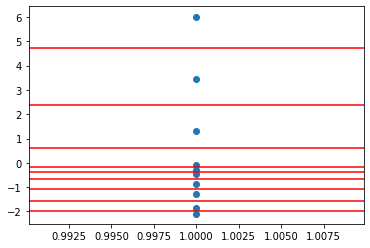

In [81]:
t_dist_quantiles = []
quantiles_percent = []

for i, val in enumerate(t_dist[:-1]): #one less
    #records midpoints(x+val)/2
    t_dist_quantiles.append((val + t_dist[i+1])/2)
    #records the proportion of the data that lies below the quantile    
    quantiles_percent.append((i+1)/len(t_dist))
    
plt.scatter(np.ones(10), t_dist)
for i in t_dist_quantiles:
     plt.axhline(y=i, color='red')

In [82]:
qp_array = np.array(quantiles_percent).reshape(-1,1)
tq_array = np.array(t_dist_quantiles).reshape(-1,1)

qq_df = pd.DataFrame(np.concatenate((qp_array, tq_array), axis=1),columns=['percent_below', 'quantile'])
display(qq_df)    

,percent_below,quantile
0,0.1,-1.981018
1,0.2,-1.576926
2,0.3,-1.076140
3,0.4,-0.670199
4,0.5,-0.383641
5,0.6,-0.188289
6,0.7,0.619105
7,0.8,2.371748
8,0.9,4.722177


Note, that the first quantile value is b/w the first and second value of the `t_dist` array. The `percent_below` column tells us that 10% of our data lies below the first quantile value.

Lets also get the reference quantile assuming data was drawn from normal distribution. We need to records the proportion of the data that lies below each quantile.

In [83]:
qq_df['theoretical_quantile'] = [norm.ppf(percentage) for percentage in qq_df['percent_below']]
display(qq_df) 

,percent_below,quantile,theoretical_quantile
0,0.1,-1.981018,-1.281552
1,0.2,-1.576926,-0.841621
2,0.3,-1.076140,-0.524401
3,0.4,-0.670199,-0.253347
4,0.5,-0.383641,0.000000
5,0.6,-0.188289,0.253347
6,0.7,0.619105,0.524401
7,0.8,2.371748,0.841621
8,0.9,4.722177,1.281552


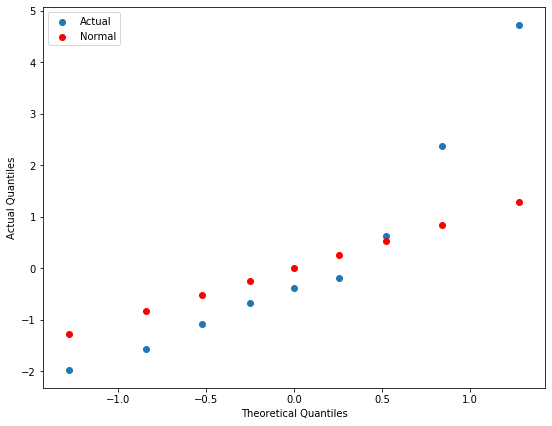

In [84]:
plt.subplots(figsize=(9,7))
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['quantile'], label='Actual');
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['theoretical_quantile'], 
            c='red', label='Normal')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Actual Quantiles')
plt.legend()
plt.savefig('qq_plot', bpi=150);
plt.show()

* **Take away**

* The slope tells us whether the steps in our data are too big or too small. One can observe as how the step sizes (a.k.a. quantiles) compare between our data and the normal distribution.

* A steeply sloping section of the QQ plot means that in this part of our data, the observations are more spread out than we would expect them to be if they were normally distributed. One example cause of this would be an unusually large number of outliers in the tails

* A flat QQ plot means that our data is more bunched together than we would expect from a normal distribution. This is the case if data follows a uniform distribution rather than normal distribution.

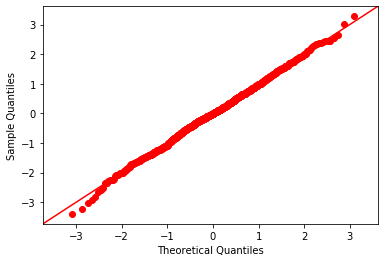

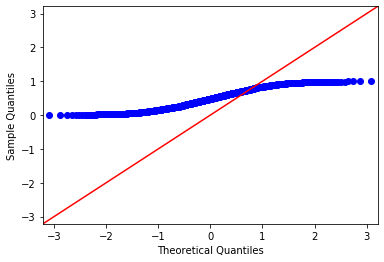

In [92]:
import statsmodels.api as sm #pip install -U statsmodels
import random# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]# Create QQ plot
random_normals = [np.random.normal() for i in range(1000)]
# Create QQ plot
sm.qqplot(np.array(random_normals), line='45', color='red')
sm.qqplot(np.array(random_uniform), line='45')
plt.show()

# Leet Code Problem 126

Given a non-empty array of integers, every element appears twice except for one. Find that single one.

https://leetcode.com/problems/single-number/

In [162]:
def singleNumber(nums):    
    return ( list({x for x in nums if nums.count(x) == 1})[0] )
print(singleNumber([1,2,4,1,2]))

4


In [165]:
def singleNumber(nums):    
    i = 0
    while nums[i] in nums[:i] or nums[i] in nums[i+1:]:       
        i += 1
    return nums[i]

print(singleNumber([1,2,4,1,2]))

4


# running median

In [3]:
def running_median(n): # FIX ME
    n.sort()
    for i in range(len(n)):
        if i==0: print(n[i])
        else:
            if i%2==0: print((n[i//2-1]+n[i//2+1])/2)
            else: print(n[i//2+1]) #// divide for integer
                
                
l = [2, 1, 5, 7, 2, 0, 5]
#expected output 2, 1.5, 2, 3.5, 2, 2, 2

print (running_median(l))

0
1
1.0
2
1.5
2
3.5
None


# Anagram Soloutions (CS)

In [7]:
def anagramSolution2(s1,s2):
    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort() #O(n^2) or O(nlog(n))
    alist2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches: #O(n)
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

print(anagramSolution2('needle','ll'))



False


'\ndef leet(s1,s2):\n    alist1 = list(s1)\n    alist2 = list(s2)\n\n    alist1.sort() #O(n^2) or O(nlog(n))\n    alist2.sort()\n\n    pos = 0\n    matches = True\n    \n    while pos < len(s1) and matches:\n        if alist1[pos]==alist2[pos]:\n            \n'

In [ ]:
def leet(s1,s2):
    alist1 = list(s1)
    alist2 = list(s2)

    #alist1.sort() #O(n^2) or O(nlog(n))
    #alist2.sort()
    3print(alist1, alist2)
    pos = 0
    matches = True
    for i, v in enumerate(alist1):
        
    #while pos < len(s1) and matches:
     #   if alist1[pos]==alist2[pos]: print (alist1[pos])
    #else: 
    
print(leet('needle', 'll'))        

['d', 'e', 'e', 'e', 'l', 'n'] ['l', 'l']


In [4]:
def anagramSolution1(s1,s2):
    stillOK = True
    if len(s1) != len(s2):
        stillOK = False

    alist = list(s2)
    pos1 = 0

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK

print(anagramSolution1('abcde','edcba'))


True


In [5]:
def anagramSolution4(s1,s2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(s1)):        #O(n)
        pos = ord(s1[i])-ord('a')
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):        #O(n)
        pos = ord(s2[i])-ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    stillOK = True
    while j<26 and stillOK:        #26
        if c1[j]==c2[j]:
            j = j + 1
        else:
            stillOK = False

    return stillOK

print(anagramSolution4('apple','pleap'))


True


In [25]:


def maxScore(s):
    l = list(s)
    max_v = 0
    for i in range(len(l)-1):   
        s_l = l[:i+1]; s_r = l[i+1:]
        print (s_l, s_r)
        
        s_l = [int(j) for j in s_l if j=='0']
        s_r = [int(j) for j in s_r if j=='1']
        
        sum = len(s_l)+ len(s_r)
        if sum > max_v: max_v = sum
               
    return max_v 

print(maxScore('011101'))

['0'] ['1', '1', '1', '0', '1']
['0', '1'] ['1', '1', '0', '1']
['0', '1', '1'] ['1', '0', '1']
['0', '1', '1', '1'] ['0', '1']
['0', '1', '1', '1', '0'] ['1']
5
